# Politics of Energy Transition Final Project #

## Introduction ##
Environmental support is important in the context of American politics, it is the bedrock of future environemtal reform. What I am trying to do, is find an primary variable and see how well they correlate with the support Americans have for the environment. 
Data sets:
I am going to use a few datasets today. 
1. To gague how well Americans support the environment over the years, I will use a Gallup poll stemming from 1989 until 2023. The link can be found here: https://news.gallup.com/poll/1615/environment.aspx
2. I will use the Fred dataset to see how crude oil prics have changed over the years. I have matched the data to come from 1989 to 2023. The link can be found here: https://fred.stlouisfed.org/series/DCOILWTICO
3. For my second hypothesis I would like to track total Oil lobbying over the years of 1989 until 2023, to find this I used an open secrets file found here: https://www.opensecrets.org/federal-lobbying/industries/summary?cycle=2007&id=E01
4. For my third hypothesis, I tested the rate of year-over-year change in gasoline prices from 1989 until 2023. The link is found here: https://www.opensecrets.org/federal-lobbying/industries/summary?cycle=2007&id=E01

## Hypothesis 1: ##
Crude oil price: The more expensive oil is, the less Americans will worry about the environment. We can see that the volitility of certain resources have a connection to public opinion. This is seen in the public opinion readings like Anthony Leiserowitz's work, "Climate Change in the American Mind: Beliefs & Attitudes, Spring 2023."

In [1]:
#i am importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot  as plt
plt.style.use("ggplot")
import scipy.stats
from scipy.stats import linregress

### Cleaning Data Climate\Oil Price ###

### Climate ####
I will begin by cleaning the data and making the columns and rows easy to manipulate in the future

In [2]:
df = pd.read_csv("Climate_1989-2023.csv")

In [3]:
df = df.rename(columns={'Global warming or climate change': 'Year'})

In [4]:
df.columns

Index(['Year', 'Great Deal', 'Fair Amount', 'Only a little', 'Not at all',
       'No opinion', 'Totals'],
      dtype='object')

In [5]:
df = df[['Year', 'Great Deal', 'Fair Amount',
       'Only a little', 'Not at all', 'No opinion']]

In [6]:
df.loc[:, 'Year'] = df['Year'].str[:-6]

In [7]:
df["Year"] = df['Year'].str.replace("M"," ")
df["Year"] = df['Year'].str.replace("M"," ")
df["Year"] = df['Year'].str.replace("Apr"," ")
df["Year"] = df['Year'].str.replace("Oct"," ")
df['Year'] = df['Year'].str.replace("Mar"," ")
df['Year'] = df['Year'].str.replace("A"," ")
df['Year'] = df['Year'].str.replace("r"," ")
df['Year'] = df['Year'].str.replace("a"," ")

In [8]:
df['Support_Env'] = df['Great Deal'] + df['Fair Amount']

In [9]:
df['Oppose_Env'] = df['Only a little'] + df['Not at all']

In [10]:
df = df[['Year','Support_Env', 'Oppose_Env']]
df["Year"].dtype

dtype('O')

### Oil Price ###

In [11]:
df2 = pd.read_csv("crude-oil-prices.csv")

In [12]:
df["Year"] = df["Year"].astype("int64")

In [13]:
df2 = df2.rename(columns={'Oil price - Crude prices since 1861 (current US$)': 'Price'})

In [14]:
df.columns

Index(['Year', 'Support_Env', 'Oppose_Env'], dtype='object')

In [15]:
df2 = df2[["Year", "Price"]]

In [16]:
df2 = df2[-34:]

In [20]:
df.head(5)

,Year,Support_Env,Oppose_Env
28,1989,63,30
27,1990,57,36
26,1991,62,34
25,1997,50,46
24,1999,59,39


In [19]:
df =  df.iloc[::-1] 

### Data Analysis ###
Now that the data is workable I will begin analysing it, ill begin with a line graph to see how the data visualies, then I will make a scatterplot to see the realtionship between both variables.

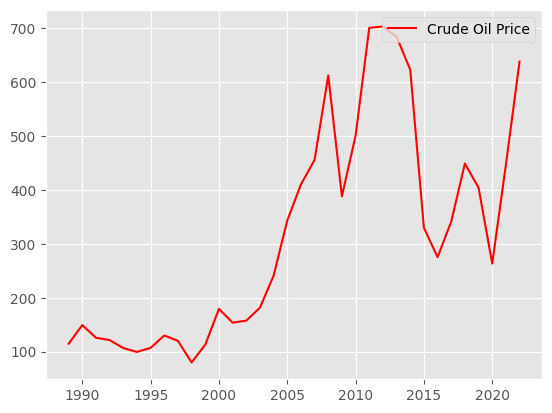

In [398]:
# Here is how the crude oil prices over the years look
plt.plot( df2["Year"], df2["Price"], color='red',label='Crude Oil Price')
plt.legend(loc='upper right', fontsize='10')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

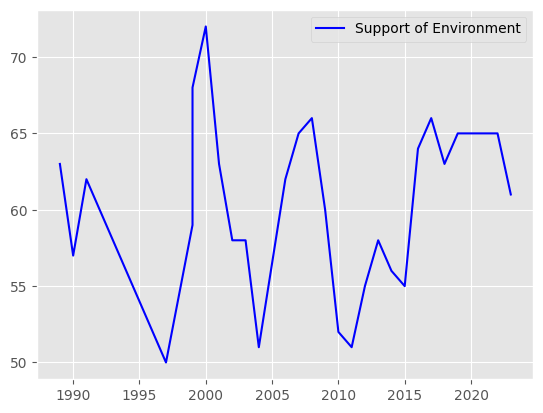

In [139]:
# This is how support for the envirionment has looked over the years.
plt.plot( df["Year"], df["Support_Env"], color='blue',label='Support of Environment')
plt.legend(loc='upper right', fontsize='10')
plt.show

In [25]:
df['Support_Env'] = df['Support_Env'].astype(float)
print(df["Support_Env"].dtype)
print(df2["Price"].dtype)

float64
float64


In [399]:
df.head(1)

,Year,Support_Env,Oppose_Env
28,1989,63.0,30


In [135]:
#I am merging both variables into one working file so I can create a single scatterplot
merge_df = pd.merge(df, df2, on='Year')

In [162]:
slope, intercept, r_value, p_value, std_err = linregress(merge_df['Support_Env'], merge_df['Price'])
trendline = slope * merge_df['Support_Env'] + intercept

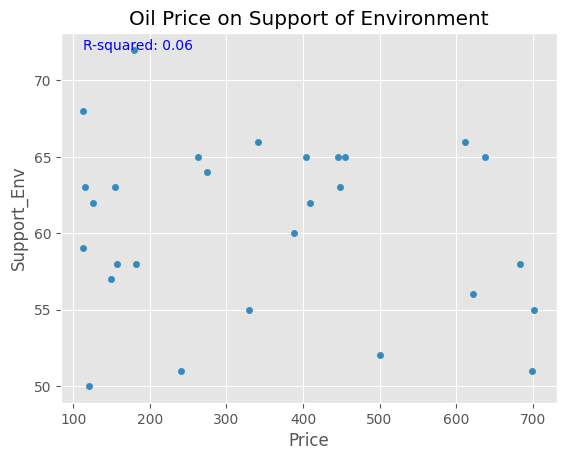

In [167]:
scatter = merge_df.plot.scatter(x ='Price', y = 'Support_Env', title='Oil Price on Support of Environment')
plt.text(merge_df['Price'].min(), merge_df['Support_Env'].max(), f'R-squared: {r_value**2:.2f}', fontsize=10, color='blue', ha = 'left')
plt.show()

In [132]:
#X values is the price variable in the merge_df
# while the Y values is the share of support in the merge_df
slope, intercept, r_value, p_value, std_err = linregress(merge_df['Price'], merge_df['Support_Env'])
equation = f"y = {slope:.2f}x + {intercept:.2f}"
print(equation)

y = -0.00x + 62.00


In [134]:
print(p_value)
print(r_value)
print(slope)

0.43811427737645625
-0.15263039817824592
-0.004249812204802418


### Linear Regression and Results ###


The equation $$ y = -0.00x + 62.00 $$ is the relationship between both the oil price and support for environment variables. It suggests a weak relationship. This can be due to a variety of reasons, I suspect there is a better measure for energy prices thatn crude oil prices, and will try other avenues. The findings find a lack of evidence to support the claim that oil price will affect the support of enviornment in the United States. 

## Hypothesis 2: ###
Oil Lobbying Contributions: The more contributions towards oil lobbying firms give, the less the public advocates for enviornmental rights. We can go back to the fossil firms and lobbying week when we learned that lobbying can have an affect on the perception of American's view on environmental issues. 

### Cleaning data ###
I am going to open a new data set and look at the data provided

In [140]:
df3 = pd.read_csv("OpenSecrets_Oil_Data.csv")

In [400]:
df3.head(3)

,Year,Total,Clients
0,2022,125581364.0,209
1,2021,120727396.0,209
2,2020,113179376.0,219


In [151]:
df3["Total"] = df3["Total"].astype("float64")

### Analysis ###
Because the dataet came in ready to use, I will begin with the visualization

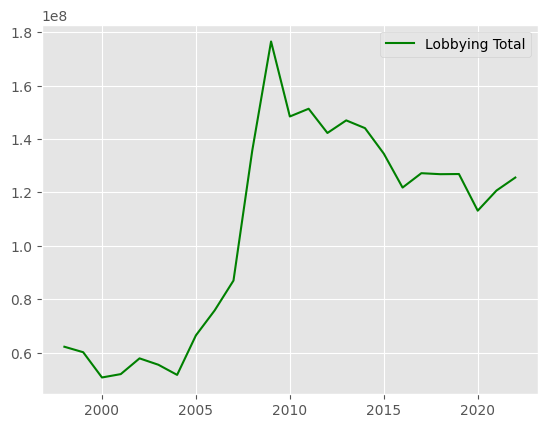

In [153]:
#THis is the line graph of lobby effort in hundreds of millions and years
plt.plot( df3["Year"], df3["Total"], color='green',label='Lobbying Total')
plt.legend(loc='upper right', fontsize='10')
plt.show()

In [154]:
# I am once again going to merge the environmental support table with the lobbying table and get a scatterplot to view the realtionship
Lob_merge = pd.merge(df, df3, on = "Year")

In [401]:
Lob_merge.head(4)

,Year,Support_Env,Oppose_Env,Total,Clients
0,1999,59.0,39,60209200.0,140
1,1999,68.0,30,60209200.0,140
2,2000,72.0,27,50753883.0,145
3,2001,63.0,35,52013571.0,142


Text(50753883.0, 72.0, 'R-squared: 0.06')

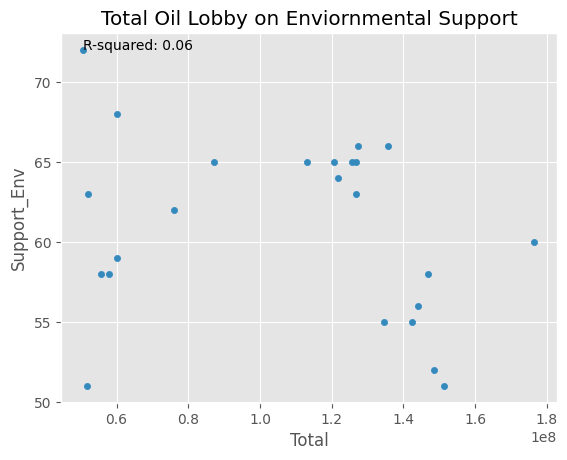

In [172]:
lob_scatter = Lob_merge.plot.scatter(x = 'Total', y = 'Support_Env' , title = "Total Oil Lobby on Enviornmental Support")
plt.text(Lob_merge['Total'].min(), Lob_merge["Support_Env"].max(), f'R-squared: {r_value**2:.2f}', fontsize = 10, color="black", ha="left")

In [173]:
slope, intercept, r_value, p_value, std_err = linregress(Lob_merge['Total'], Lob_merge['Support_Env'])
equation = f"y = {slope:.2f}x + {intercept:.2f}"
print(equation)

y = -0.00x + 64.55


In [174]:
print(r_value)
print(p_value)
print(slope)

-0.23776367686175343
0.2632442766374476
-3.365573230828911e-08


### Linear Analysis and results ###
There is once again a weak result when testing for oil lobbying total and support for the environement. This can be seen with the equation $$ y = -0.00x + 64.55$$ I believe there is a confounding variable, or a delayed response that my analysis was not able to capture effectiveley. I believe there also might be a cascading effect, where the money given to politicians is not used in immediate, and is held for later use. 

## Hypothesis 3: ##
Gasoline Price: The more gasoline prices fluctuate year over year will negitavley affect how people view the environment. I think this can go back to the Public Opinion section and Leiserowitz's work. 

### Cleaning ###
I will begin with importing the data and cleaning it

In [280]:
gdf = pd.read_csv("Gas_Prices.csv")

In [281]:
gdf =  gdf.iloc[::-1] 

In [282]:
gdf = gdf[-36:]

In [283]:
gdf = gdf[["Year", "Real Values"]]

In [402]:
gdf.head(5)

,Year,Real Values,Year_Change(%)
35,1989,2.46,NaN
34,1990,2.67,8.536585
33,1991,2.50,-6.367041
32,1992,2.39,-4.400000
31,1993,2.28,-4.602510


In [363]:
#Creating the Column that tracks percent change of gas prices year over year
gdf['Year_Change'] = gdf['Real Values'].pct_change()*100

Year Change Formula
$$ YC = \frac{x_2-x_1}{x_1} $$

In [369]:
gdf = gdf[['Year', 'Real Values','Year_Change(%)']]

In [177]:
#I am going to merge both the hypothesis 1 and hypothesis 2 merge tables, to make it easier to help me merge the last gas table in the future.
sup_merge = pd.merge(merge_df, Lob_merge, on = "Year")

In [383]:
gas_merge = pd.merge(sup_merge, gdf, on = "Year")

In [387]:
gas_merge.head(1)

,Year,Support_Env_x,Oppose_Env_x,Price,Support_Env_y,Oppose_Env_y,Total,Clients,Real Values,Year_Change(%)
0,1999,59.0,39,113.02819,59.0,39,60209200.0,140,2.11,8.205128


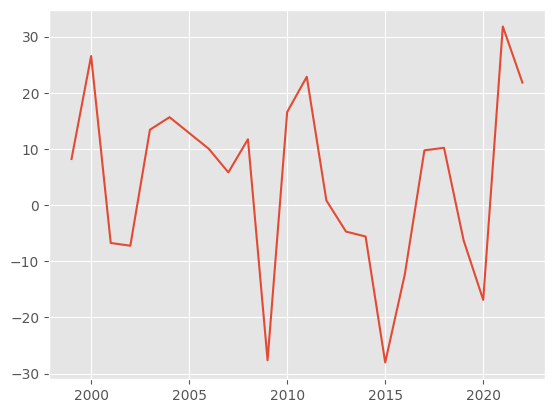

In [404]:
#This is a line graph that tracks the year over year change over the years
plt.plot(gas_merge["Year"], gas_merge['Year_Change(%)'])
plt.show()

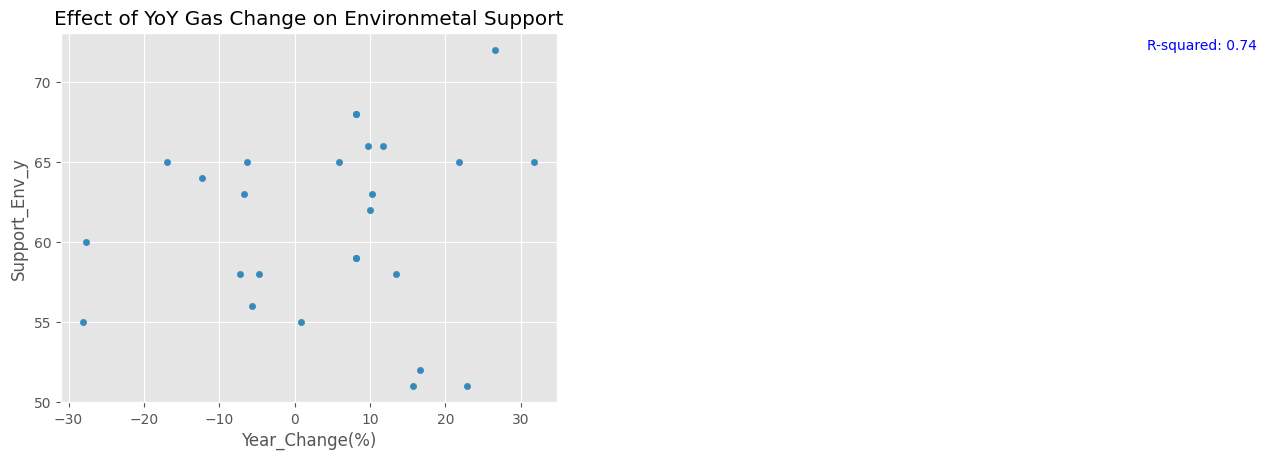

In [396]:
#THis is a scatter plot that tracks the yearly change and the support americans have for the environemnt. 
gas_merge.plot.scatter(x ='Year_Change(%)', y = 'Support_Env_y', title='Effect of YoY Gas Change on Environmetal Support')
plt.text(merge_df['Price'].min(), merge_df['Support_Env'].max(), f'R-squared: {r_value**2:.2f}', fontsize=10, color='blue', ha = 'left')
plt.show()

In [405]:
slope, intercept, r_value, p_value, std_err = linregress(gas_merge['Year_Change(%)'], gas_merge['Support_Env_y'])
equation = f"y = {slope:.2f}x + {intercept:.2f}"
print(equation)

y = 0.05x + 60.91


In [406]:
print(r_value)
print(p_value)
print(slope)

0.12822198095168463
0.5324721652125131
0.04693727203673618


### Linear regression and analysis ###
We can see a relationship between both variables in this case with this equation. $$ y = 0.05x + 60.91 $$ There is a positive relationship in where support for the environment actually goes up as there are positive yearly changes. This can be for a variety of reasons, and I believe Americans begin to think more critically when the prices of their gas tanks change and begin to form more opinions. These new opinions can be positive, as the data demonstrates. 

## Multi-Variable Analysis ##
In this section, I will compare all of the variables mentioned to see in what context they are related with one another. I will use the correlate tool. 

- Support_Env_x is the share of support for the environment
- Price is the price of oil in any given year
- Total is the total amount of money spent
- Clients is the number of firms in a year considered to donate to the oil lobby
- Real Values is the yearly price of a gallon of gas adjusted for inflation
- Year Change measures the volatility of gas prices by tracking the percent change over years

In [408]:
gas_merge.head(5)

,Year,Support_Env_x,Oppose_Env_x,Price,Support_Env_y,Oppose_Env_y,Total,Clients,Real Values,Year_Change(%)
0,1999,59.0,39,113.02819,59.0,39,60209200.0,140,2.11,8.205128
1,1999,59.0,39,113.02819,68.0,30,60209200.0,140,2.11,8.205128
2,1999,68.0,30,113.02819,59.0,39,60209200.0,140,2.11,8.205128
3,1999,68.0,30,113.02819,68.0,30,60209200.0,140,2.11,8.205128
4,2000,72.0,27,179.23068,72.0,27,50753883.0,145,2.67,26.540284


In [409]:
gas_merge.columns

Index(['Year', 'Support_Env_x', 'Oppose_Env_x', 'Price', 'Support_Env_y',
       'Oppose_Env_y', 'Total', 'Clients', 'Real Values', 'Year_Change(%)'],
      dtype='object')

In [410]:
#multi-variable correlation table to see the effect of each variable in comparison with one another 
gas_merge[['Year', 'Support_Env_x', 'Price',
       'Total',' Real Values','Year_Change(%)' ]].corr()

,Year,Support_Env_x,Price,Total,Real Values,Year_Change(%)
Year,1.000000,-0.000143,0.614773,0.740060,0.473159,-0.125451
Support_Env_x,-0.000143,1.000000,-0.306535,-0.257843,-0.335238,0.128222
Price,0.614773,-0.306535,1.000000,0.793631,0.972244,0.104911
Total,0.740060,-0.257843,0.793631,1.000000,0.698756,-0.272000
Real Values,0.473159,-0.335238,0.972244,0.698756,1.000000,0.133657
Year_Change(%),-0.125451,0.128222,0.104911,-0.272000,0.133657,1.000000


### Analysis ###
We can see a variety of intersting opbservations in our correlation table. There is a medium-level connection between many of these variables. Environmental support, the variable we were tracking, seems to resonate most with our Real Values variable. I suggest further analysis for all of these variables with one another, with a larger data set stemming from farther back in time.  

## Conclusion ##

The average American seems to care about the environment a great deal. Their feelings fluctuate through a variety of different circumstances, but of these, the change in year-to-year gas is the most compelling variable. The field of American Politics can benefit greatly by using methods like these to test the power of variables against one another. 